In [15]:
# imports

import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

from report_writer import ReportWriter
from utils import get_info

In [16]:
RESULTS_FOLDER = "../results"
DATA_FOLDER = "../data"
TEMP_FOLDER = "../tmp"

In [17]:

df_train_path = os.path.join(DATA_FOLDER, 'train_dataset.csv')

# Load the test dataset
df_train = pd.read_csv(df_train_path)


Race Percentages:
                              Race  Percentage  Counts
race                                                  
African-American  African-American       51.24    2957
Caucasian                Caucasian       34.01    1963
Hispanic                  Hispanic        8.82     509
Other                        Other        5.23     302
Asian                        Asian        0.45      26
Native American    Native American        0.24      14


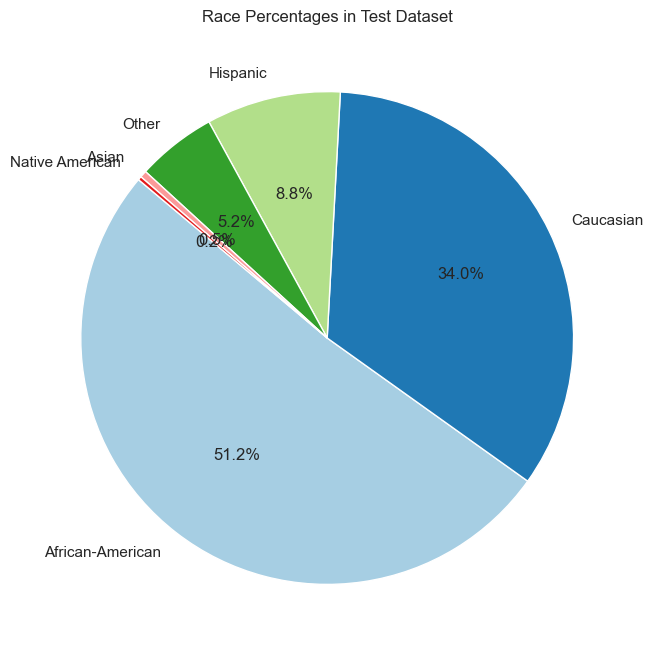

In [19]:
# Calculate race counts and percentages
race_counts = df_train['race'].value_counts()
race_percentages = (race_counts / race_counts.sum() * 100).round(2)

# Save percentages into a DataFrame
race_percentages_df = pd.DataFrame({
    'Race': race_percentages.index,
    'Percentage': race_percentages.values,
    'Counts' : race_counts
})

# Display the race percentages DataFrame
print("Race Percentages:")
print(race_percentages_df)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    race_percentages, 
    labels=race_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Race Percentages in Test Dataset")
plt.show()



Sex Percentages:
      Sex  Percentage
0    Male       80.16
1  Female       19.84


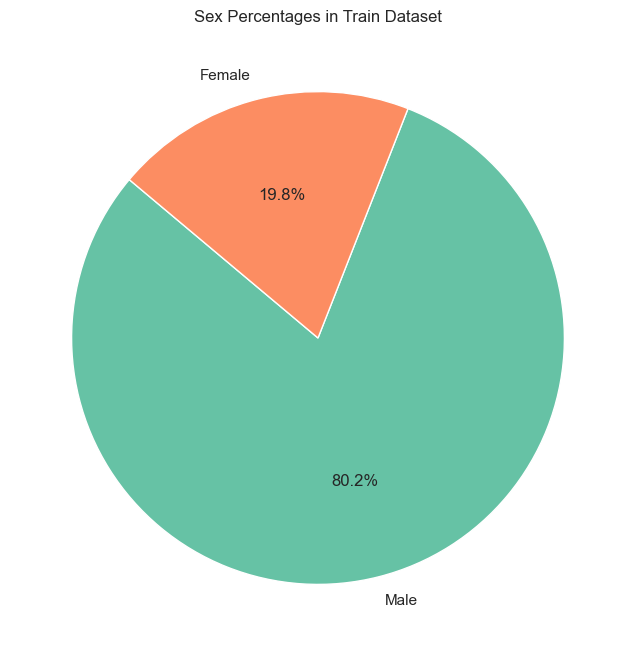

In [20]:
# Calculate sex counts and percentages
sex_counts = df_train['sex'].value_counts()
sex_percentages = (sex_counts / sex_counts.sum() * 100).round(2)

# Save percentages into a DataFrame
sex_percentages_df = pd.DataFrame({
    'Sex': sex_percentages.index,
    'Percentage': sex_percentages.values
})

# Display the sex percentages DataFrame
print("Sex Percentages:")
print(sex_percentages_df)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sex_percentages, 
    labels=sex_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set2.colors
)
plt.title("Sex Percentages in Train Dataset")
plt.show()

# Save the percentages to a CSV file (optional)
sex_percentages_df.to_csv("sex_percentages.csv", index=False)


C:\Users\carme\AppData\Local\Temp\ipykernel_1608\2976611560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race", y="age", data=df_test, palette="Set2")


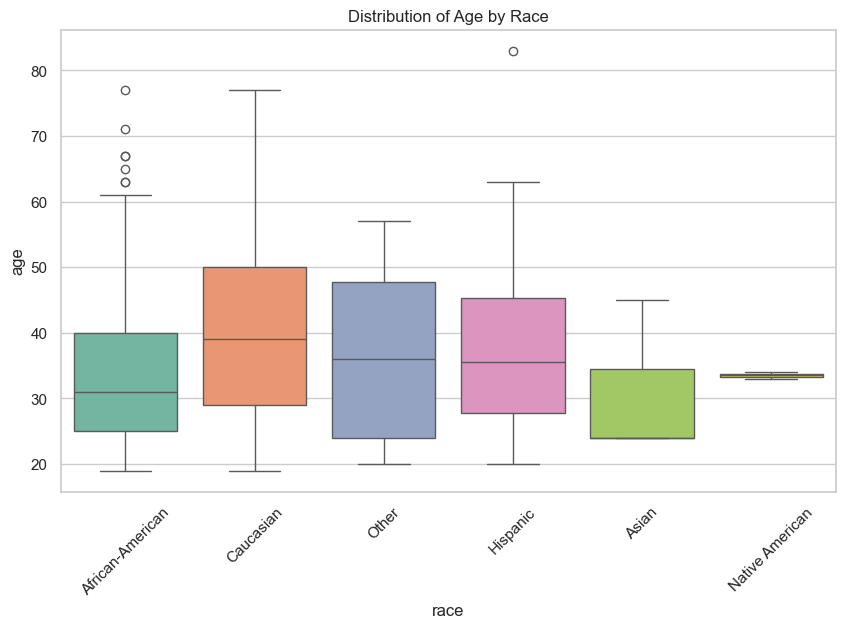

C:\Users\carme\AppData\Local\Temp\ipykernel_1608\2976611560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="race", y="two_year_recid", data=recidivism_by_race, palette="coolwarm")


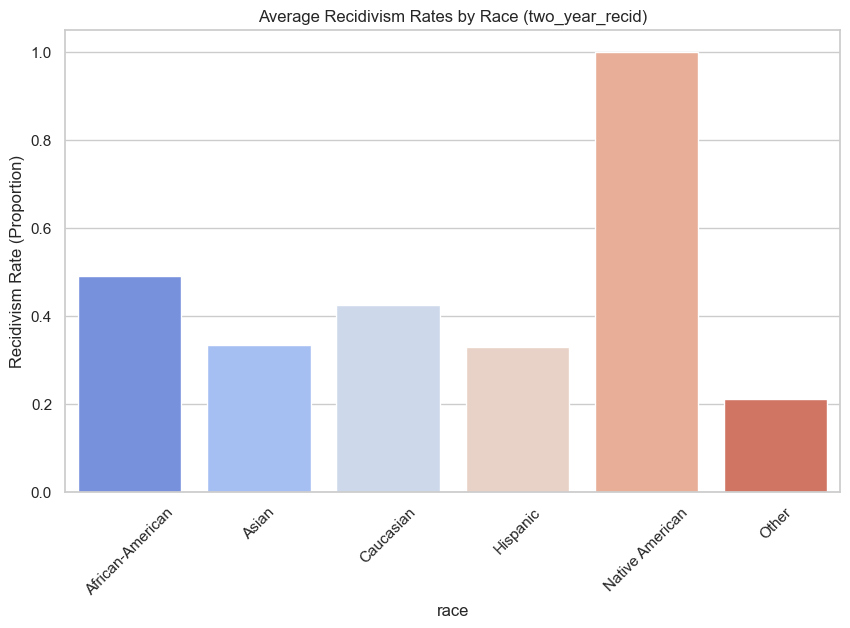

C:\Users\carme\AppData\Local\Temp\ipykernel_1608\2976611560.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="race", y="decile_score", data=df_test, palette="viridis")


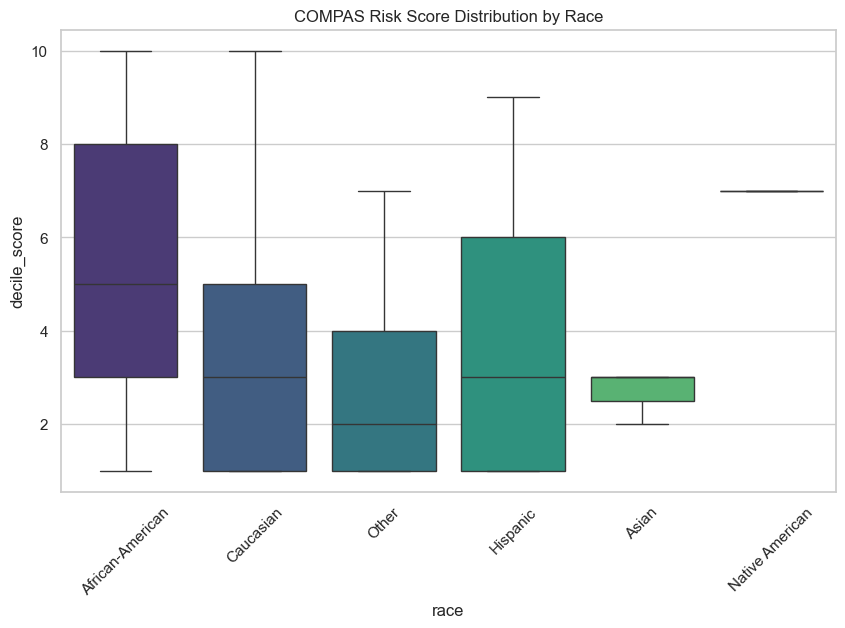

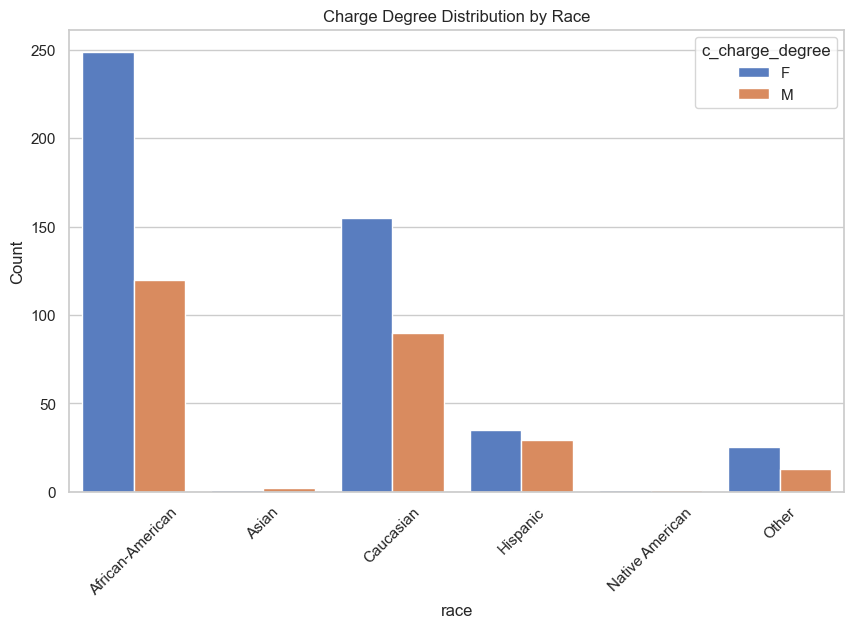

In [ ]:

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

### 1. Distribution of Age by Race
plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="age", data=df_train, palette="Set2")
plt.title("Distribution of Age by Race")
plt.xticks(rotation=45)
plt.show()

### 2. Recidivism Rates (two_year_recid) by Race
plt.figure(figsize=(10, 6))
recidivism_by_race = df_train.groupby('race')['two_year_recid'].mean().reset_index()
sns.barplot(x="race", y="two_year_recid", data=recidivism_by_race, palette="coolwarm")
plt.title("Average Recidivism Rates by Race (two_year_recid)")
plt.ylabel("Recidivism Rate (Proportion)")
plt.xticks(rotation=45)
plt.show()

### 3. COMPAS Risk Scores by Race
plt.figure(figsize=(10, 6))
sns.boxplot(x="race", y="decile_score", data=df_train, palette="viridis")
plt.title("COMPAS Risk Score Distribution by Race")
plt.xticks(rotation=45)
plt.show()

### 4. Charge Degree Distribution by Race
plt.figure(figsize=(10, 6))
charge_degree_by_race = df_train.groupby(['race', 'c_charge_degree']).size().reset_index(name='count')
sns.barplot(x="race", y="count", hue="c_charge_degree", data=charge_degree_by_race, palette="muted")
plt.title("Charge Degree Distribution by Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                              age  juv_misd_count  juv_fel_count  \
age                      1.000000       -0.113348      -0.054645   
juv_misd_count          -0.113348        1.000000       0.077071   
juv_fel_count           -0.054645        0.077071       1.000000   
juv_other_count         -0.152509        0.286483       0.049284   
priors_count             0.149479        0.243871       0.180951   
days_b_screening_arrest -0.046362        0.014375       0.019399   
two_year_recid          -0.189160        0.107444       0.084420   
decile_score            -0.377400        0.210803       0.172442   

                         juv_other_count  priors_count  \
age                            -0.152509      0.149479   
juv_misd_count                  0.286483      0.243871   
juv_fel_count                   0.049284      0.180951   
juv_other_count                 1.000000      0.101289   
priors_count                    0.101289      1.000000   
days_b_screening_ar

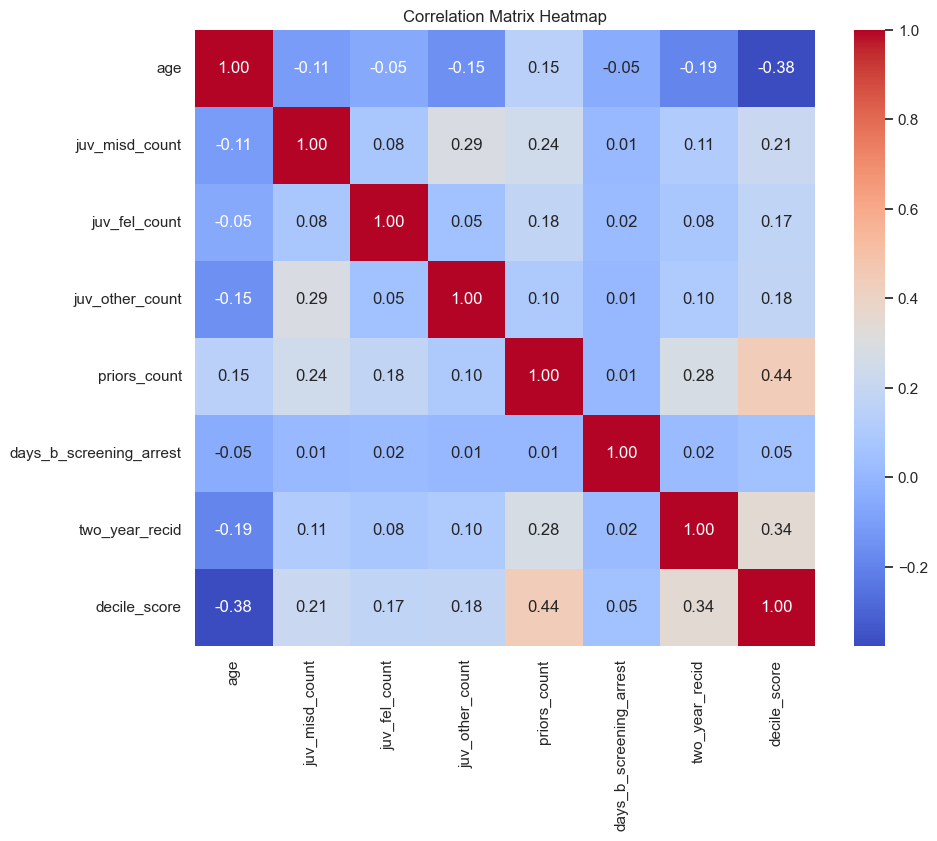

In [21]:
# Select only numerical columns for correlation analysis
numerical_columns = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation of two_year_recid and decile_score by race:
               race         level_1  correlation
0  African-American  two_year_recid     0.327138
1             Asian  two_year_recid     0.625000
2         Caucasian  two_year_recid     0.336025
3          Hispanic  two_year_recid     0.218815
4   Native American  two_year_recid     0.600256
5             Other  two_year_recid     0.322064


C:\Users\carme\AppData\Local\Temp\ipykernel_1608\4035391209.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='correlation', data=correlation_by_race, palette='coolwarm')


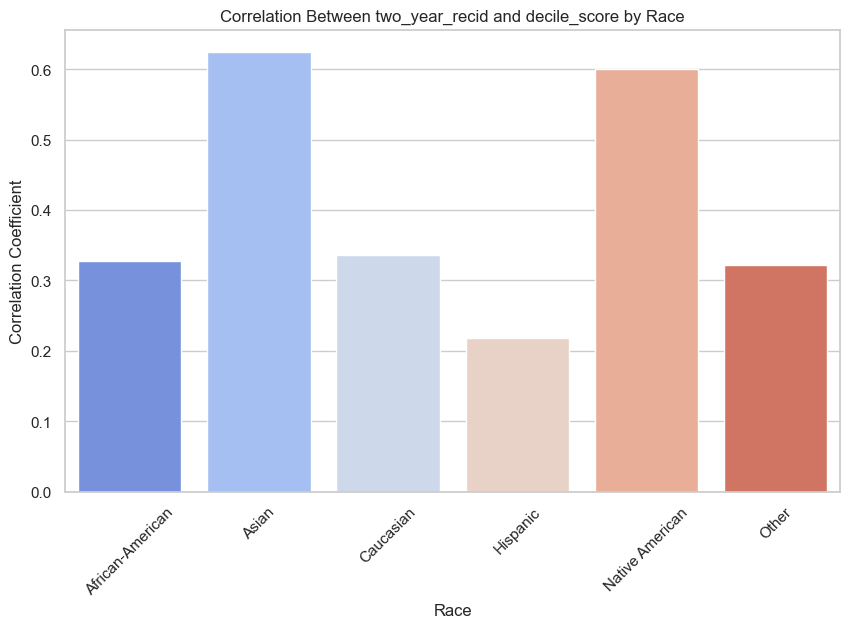

In [22]:
# Group the data by race and calculate correlation between 'two_year_recid' and 'decile_score'
correlation_by_race = (
    df_train.groupby('race')[['two_year_recid', 'decile_score']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'decile_score': 'correlation'})
)

# Display the correlation results
print("Correlation of two_year_recid and decile_score by race:")
print(correlation_by_race)

# Visualize the correlation using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='correlation', data=correlation_by_race, palette='coolwarm')
plt.title("Correlation Between two_year_recid and decile_score by Race")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.show()
